# Exercise 4
Use a one-time pad to encrypt and decrypt images.

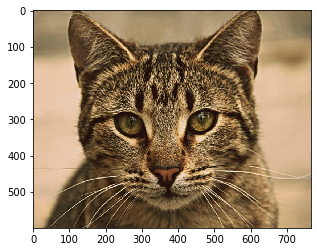

In [8]:
 %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('cat.png')
plt.imshow(img)

In [7]:
img_shape = img.shape
img_shape

(600, 766, 3)

In [10]:
img_array = np.reshape(img, -1)

In [19]:
from typing import Tuple
from unbreakable_encryption import random_key
def encrypt(original_bytes: bytes) -> Tuple[int, int]:
    dummy: int = random_key(len(original_bytes))
    original_key: int = int.from_bytes(original_bytes, "big")
    encrypted: int = original_key ^ dummy  # XOR
    return dummy, encrypted


def decrypt(key1: int, key2: int) -> str:
    decrypted: int = key1 ^ key2  # XOR
    return decrypted.to_bytes((decrypted.bit_length() + 7) // 8, "big")

Encrypt the cat

In [28]:
key, img_encrypted_int = encrypt(img_array.tobytes())

Show the encrypted image

In [39]:
def to_image(byte_array: bytes, shape, dtype):
    img_bytes = np.frombuffer(byte_array, dtype=dtype)
    return np.reshape(img_bytes, shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


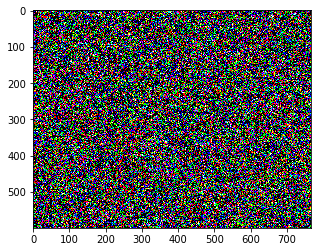

In [40]:
img_encrypted_bytes = img_encrypted_int.to_bytes((img_encrypted_int.bit_length() + 7) // 8, "big")
plt.imshow(to_image(img_encrypted_bytes, img_shape, img_array.dtype))

Decrypt the cat and show it again

In [41]:
img_decrypted = decrypt(img_encrypted_int, key)

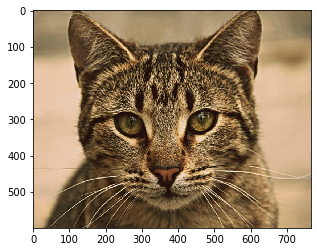

In [42]:
plt.imshow(to_image(img_decrypted, img_shape, img_array.dtype))